In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
df_company = pd.read_csv("../Data cleaning/new_preprocessed_karan.csv")

In [3]:
df_company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,isClosed
0,advertising,operating,2007,2021,MAR,2011.0,2013.0,1.0,4.325189e+06,2009.0,2010.0,1.0,2.0,1
1,cleantech,operating,2008,2021,IND,2011.0,2013.0,1.0,4.325189e+06,2009.0,2010.0,1.0,1.0,1
2,advertising,operating,2008,2021,USA,2011.0,2013.0,1.0,4.325189e+06,2008.0,2008.0,1.0,2.0,1
3,web,acquired,2007,0,USA,2008.0,2008.0,1.0,5.000000e+06,2008.0,2012.0,3.0,14.0,0
4,games_video,operating,2008,2021,USA,2011.0,2013.0,1.0,4.325189e+06,2008.0,2008.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,ecommerce,operating,2007,2021,USA,2011.0,2013.0,1.0,4.325189e+06,2013.0,2013.0,2.0,5.0,1
60271,public_relations,operating,2007,2021,USA,2008.0,2008.0,1.0,7.500000e+05,2013.0,2013.0,1.0,14.0,1
60272,consulting,operating,1959,2021,USA,2011.0,2013.0,1.0,4.325189e+06,2012.0,2013.0,3.0,44.0,1
60273,search,operating,2008,2021,USA,2011.0,2013.0,1.0,4.325189e+06,2009.0,2010.0,1.0,1.0,1


In [6]:
num_feat = ["founded_at","closed_at","first_funding_at","last_funding_at","funding_rounds","funding_total_usd","first_milestone_at","last_milestone_at","milestones","relationships"]
cat_feat = ["category_code","country_code","isClosed"]
target = ["status"]

..............................................................................................................

#  Feature Engineering

## 1) Feature selection
   a) Numerical features
  
   b) Categorical features
## 2) Log transformation and standardisation
   a) Log transformation
   
   b) Standardisation

## 3) Creation of new features



## 4) Feature encoding
   a) Target
   
   b) Categorical features

## 5) Feature engineering Documentation

............................................................................................................

## 1) Feature selection

### a) Numerical  features

#### Dependancy test

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\si

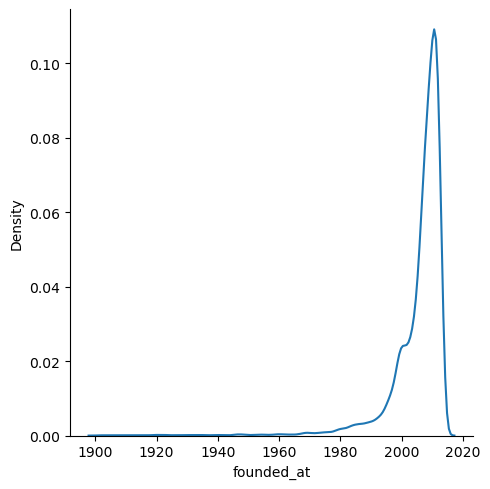

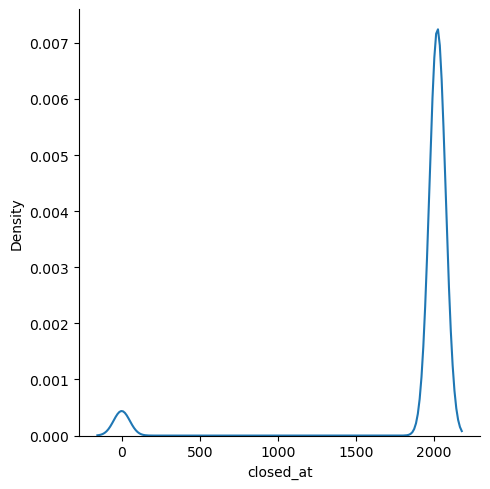

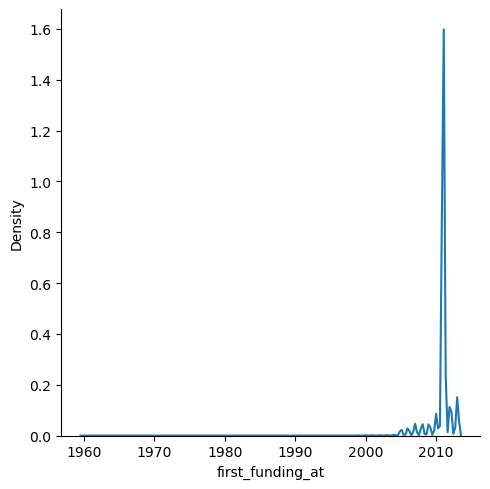

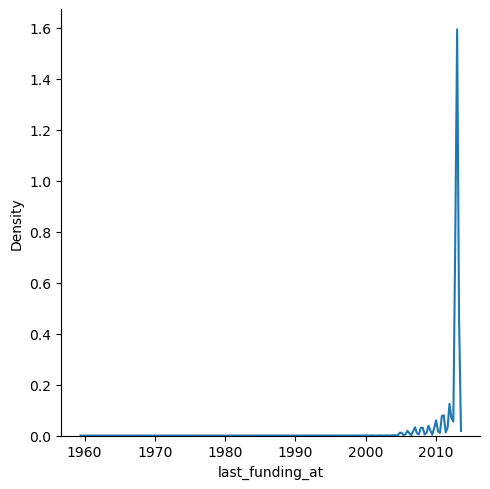

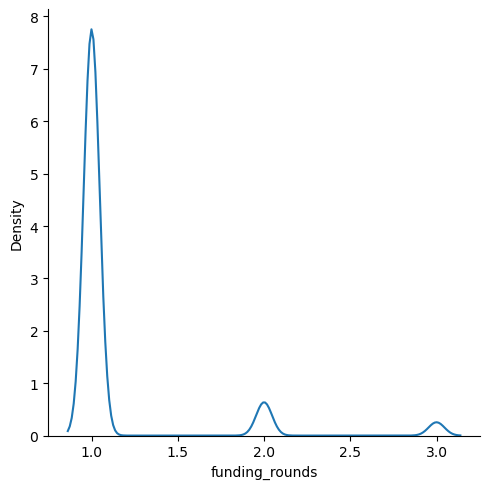

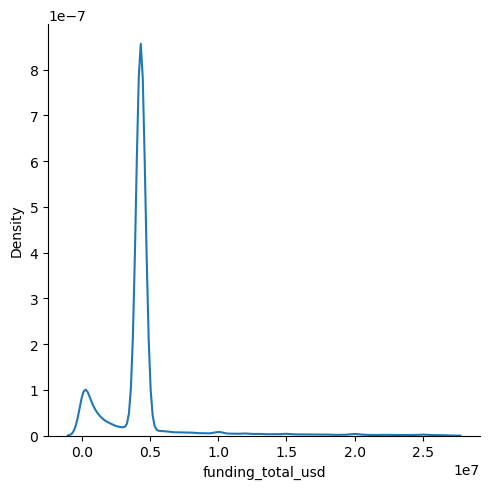

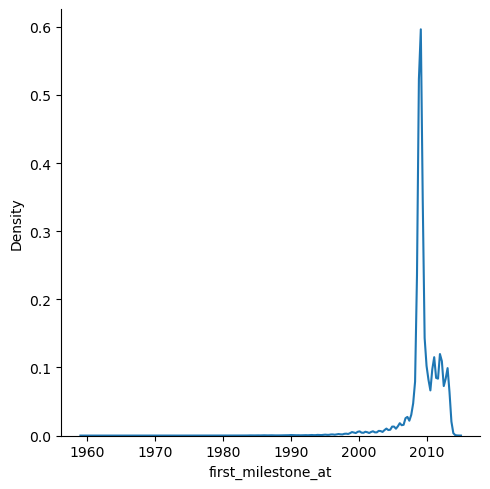

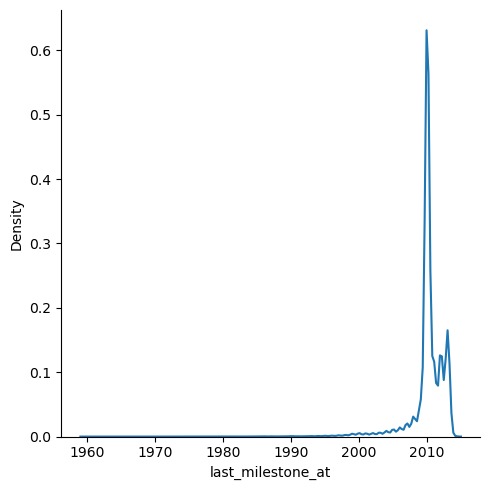

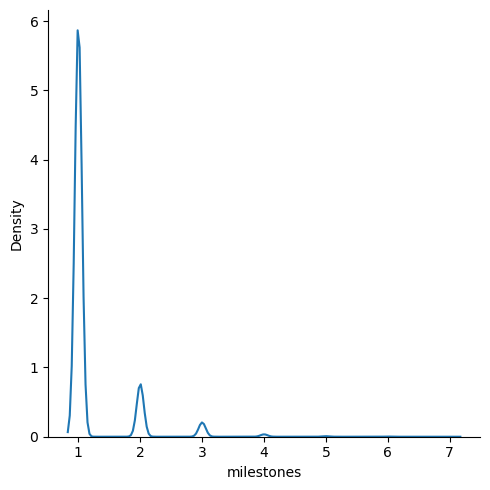

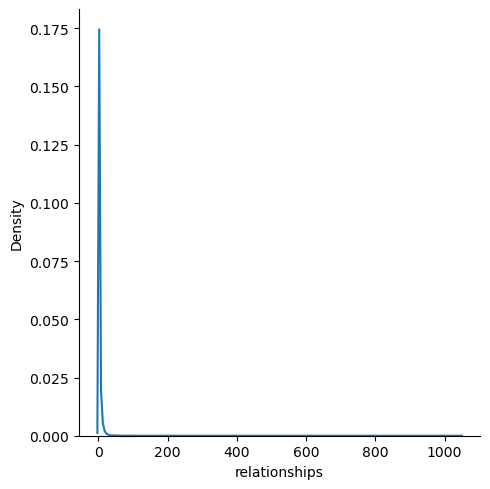

In [7]:
# Verifying the distribution of numerical features
for col in num_feat:
    sns.displot(data = df_company, x = col, kind = "kde")

In [8]:
# Applying Kruskal-Wallis test
stat = []
for col in num_feat:
    statis, pvalue = stats.kruskal(df_company.loc[df_company["status"]=="operating",col],df_company.loc[df_company["status"]=="closed",col],df_company.loc[df_company["status"]=="ipo",col],df_company.loc[df_company["status"]=="acquired",col])
    stat.append([col,pvalue,statis])

In [9]:
stat_df = pd.DataFrame(data = stat, columns = ["Name","P_value","Statistic"])
stat_df.sort_values(by = "P_value", ascending = True, inplace =True)
stat_df

,Name,P_value,Statistic
0,founded_at,0.000000e+00,2981.456046
1,closed_at,0.000000e+00,60267.821081
2,first_funding_at,0.000000e+00,3724.256375
3,last_funding_at,0.000000e+00,4847.513591
8,milestones,0.000000e+00,2009.760616
9,relationships,5.044605e-257,1186.921318
5,funding_total_usd,1.197835e-207,959.325927
6,first_milestone_at,9.224675e-140,646.302835
4,funding_rounds,4.905083e-88,407.638118
7,last_milestone_at,3.228651e-60,279.153388


#### Feature importance 

In [10]:
# Encoding target variable
lbenc = LabelEncoder()
targ_var = lbenc.fit_transform(df_company[target])
targ_var

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, ..., 3, 3, 3])

In [11]:
np.unique(targ_var)

array([0, 1, 2, 3])

In [12]:
# Training Random Forest Classifier model
rdf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rdf_class.fit(df_company[num_feat],targ_var)

RandomForestClassifier(random_state=42)

In [13]:
accuracy_score(targ_var,rdf_class.predict(df_company[num_feat]))

0.9989381999170469

In [14]:
feat_import_df1 = pd.DataFrame(data = rdf_class.feature_importances_, columns = ["feat_score"])
feat_import_df1.insert(0,"Name",num_feat)
feat_import_df1.sort_values(by = "feat_score", ascending = False)

,Name,feat_score
1,closed_at,0.823982
0,founded_at,0.042013
9,relationships,0.027246
3,last_funding_at,0.027129
2,first_funding_at,0.021627
5,funding_total_usd,0.020604
6,first_milestone_at,0.012695
8,milestones,0.011985
7,last_milestone_at,0.010296
4,funding_rounds,0.002422


In [15]:
# Training XGBOOST model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(df_company[num_feat], targ_var)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
accuracy_score(targ_var,xgb_model.predict(df_company[num_feat]))

0.9967648278722522

In [17]:
feat_import_df2 = pd.DataFrame(data = xgb_model.feature_importances_, columns = ["feat_score"])
feat_import_df2.insert(0,"Name",num_feat)
feat_import_df2.sort_values(by = "feat_score", ascending = False)

,Name,feat_score
1,closed_at,0.938070
8,milestones,0.015157
0,founded_at,0.012539
9,relationships,0.006702
7,last_milestone_at,0.006486
2,first_funding_at,0.004568
6,first_milestone_at,0.004200
3,last_funding_at,0.004180
5,funding_total_usd,0.004150
4,funding_rounds,0.003948


In [18]:
df_company2 = df_company.drop(["funding_rounds"], axis = 1)

In [19]:
num_feat.remove("funding_rounds")

### b) Categorical  features

In [20]:
# Applying Khi square and V-cramer test
stat_cat = []
for var in cat_feat:
    contingency_table = pd.crosstab(df_company2[var],df_company2["status"])
    chi2 = stats.chi2_contingency(contingency_table)[0]
    p_value = stats.chi2_contingency(contingency_table)[1]
    num_rows, num_cols = contingency_table.shape
    v_cramer = np.sqrt(chi2/(df_company2.shape[0]*min(num_rows-1,num_cols-1)))
    stat_cat.append([var,p_value,chi2,v_cramer])

In [21]:
stat_cat_df = pd.DataFrame(data = stat_cat, columns = ["Variable","P_Value","Chi_square","V_Cramer"])
stat_cat_df.sort_values(by = "P_Value", ascending = True, inplace = True)
stat_cat_df

,Variable,P_Value,Chi_square,V_Cramer
2,isClosed,0.000000e+00,60275.000000,1.000000
0,category_code,2.321406e-287,1759.086455,0.098631
1,country_code,2.144378e-59,1187.751140,0.081046


## 2) Log Transformation and Standardisation

### a) Log Transformation

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\si

<Figure size 1000x800 with 0 Axes>

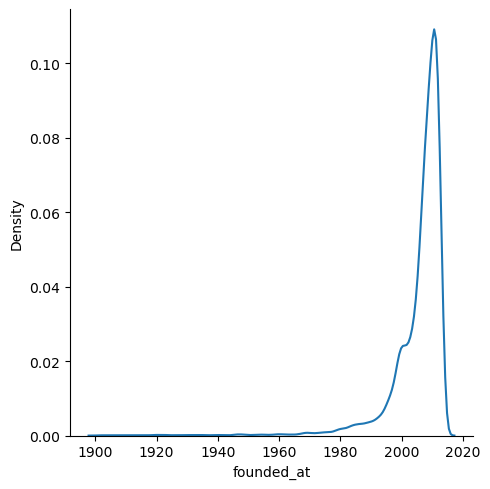

<Figure size 1000x800 with 0 Axes>

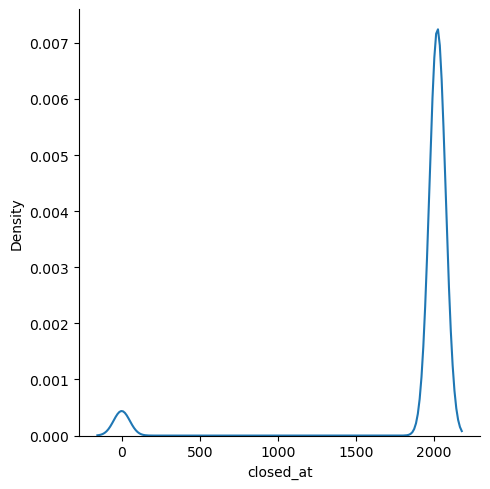

<Figure size 1000x800 with 0 Axes>

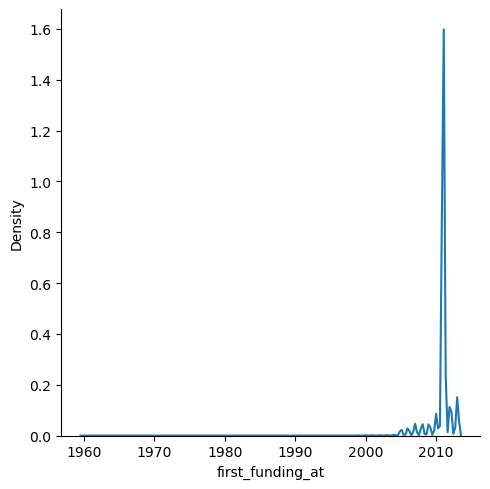

<Figure size 1000x800 with 0 Axes>

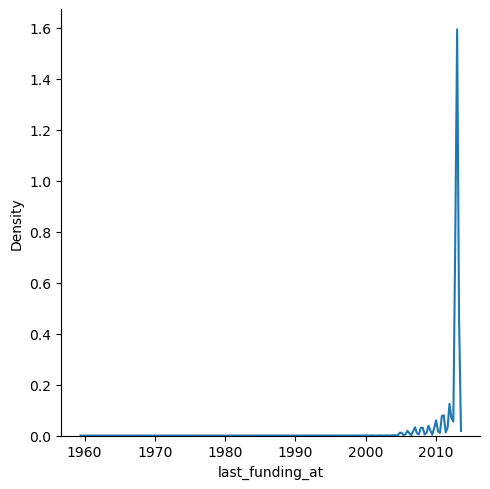

<Figure size 1000x800 with 0 Axes>

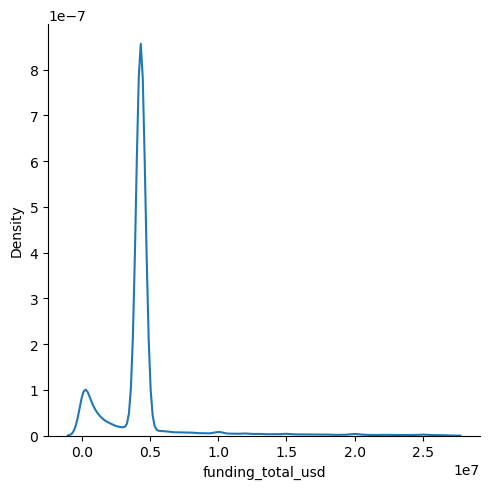

<Figure size 1000x800 with 0 Axes>

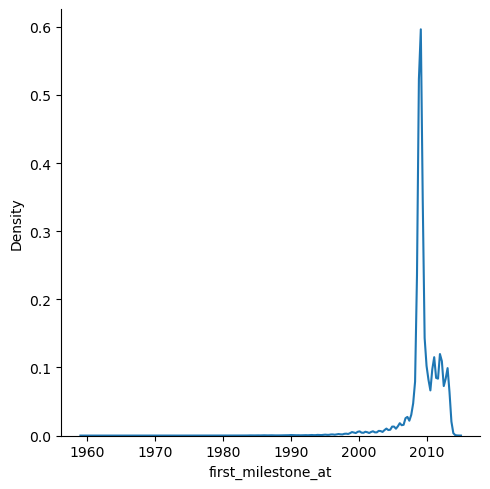

<Figure size 1000x800 with 0 Axes>

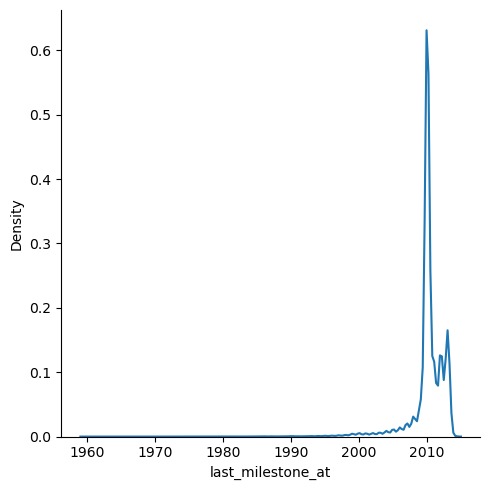

<Figure size 1000x800 with 0 Axes>

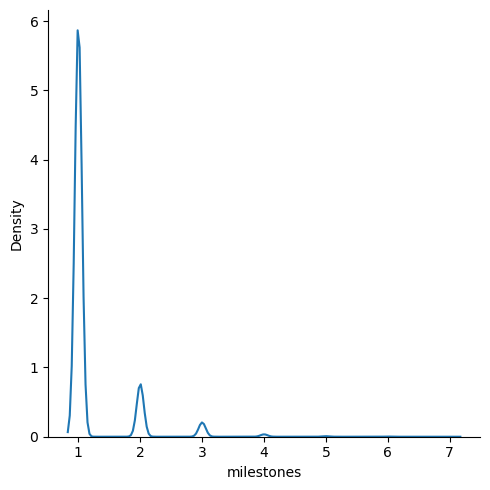

<Figure size 1000x800 with 0 Axes>

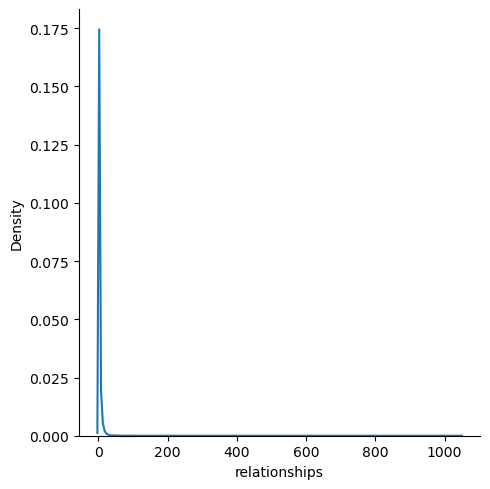

In [22]:
for col in num_feat:
    plt.figure(figsize = (10,8))
    sns.displot(data = df_company2, kind = "kde", x = col)

In [23]:
#defining log transformation function
def logfunct(x):
    df_company2[x] = np.log1p(df_company2[x])

In [24]:
# Operating transformation
for var in num_feat:
    if abs(df_company2[var].skew())>1:
        logfunct(var)
        print(var)

founded_at
closed_at
first_funding_at
last_funding_at
funding_total_usd
first_milestone_at
last_milestone_at
milestones
relationships


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\si

<Figure size 1000x800 with 0 Axes>

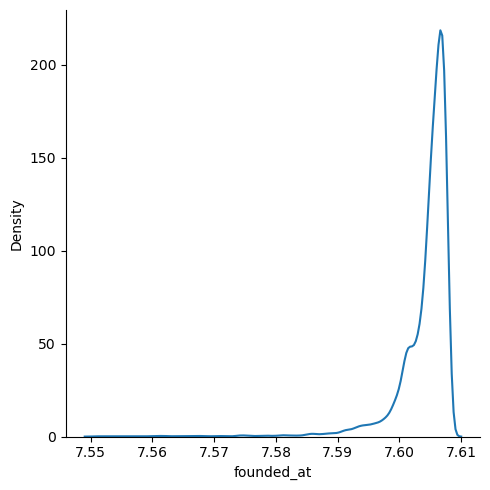

<Figure size 1000x800 with 0 Axes>

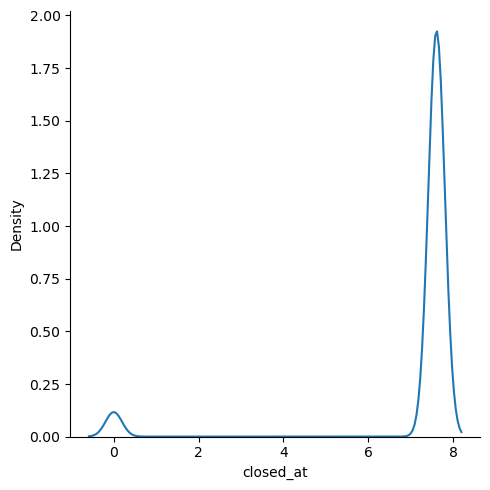

<Figure size 1000x800 with 0 Axes>

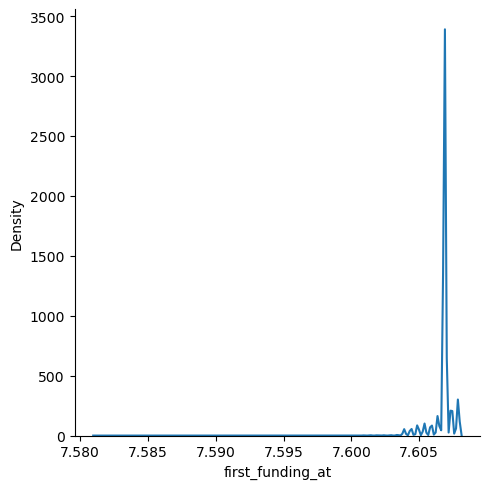

<Figure size 1000x800 with 0 Axes>

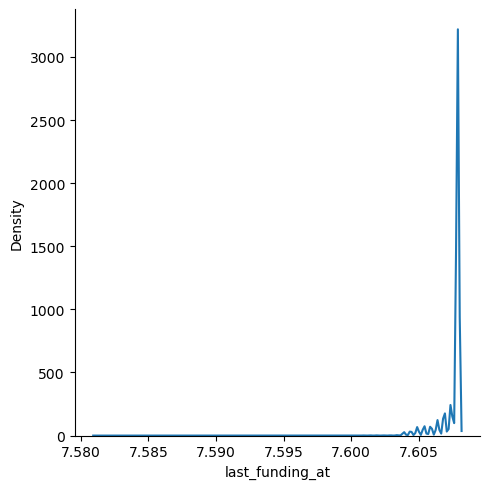

<Figure size 1000x800 with 0 Axes>

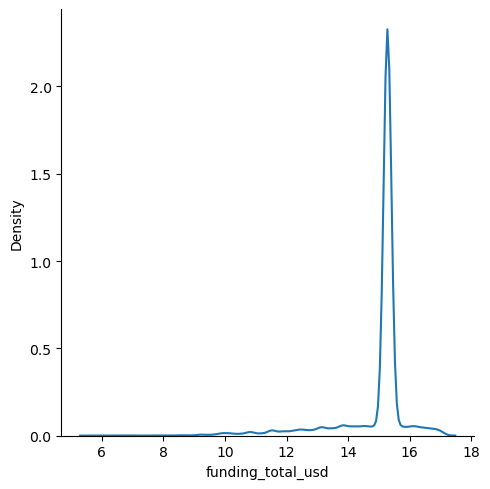

<Figure size 1000x800 with 0 Axes>

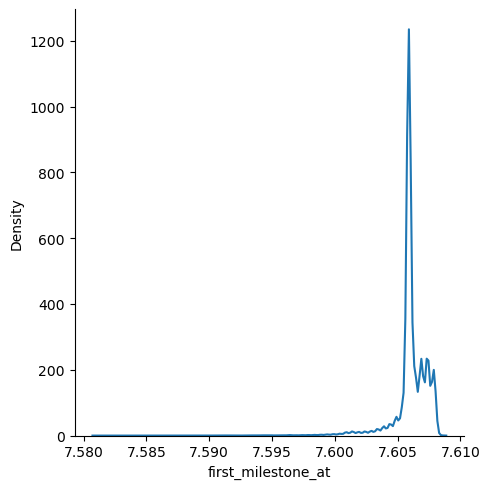

<Figure size 1000x800 with 0 Axes>

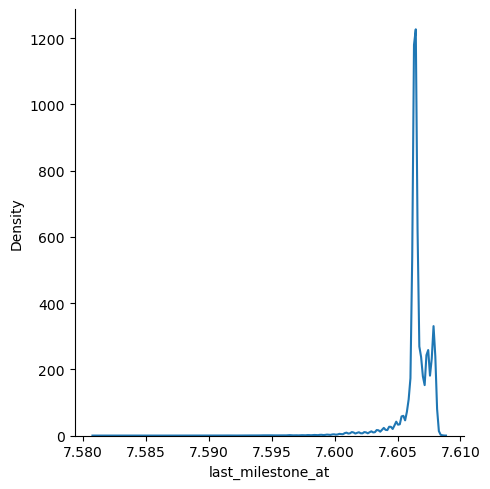

<Figure size 1000x800 with 0 Axes>

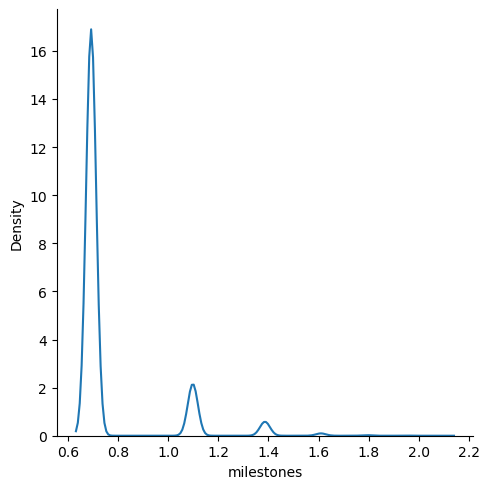

<Figure size 1000x800 with 0 Axes>

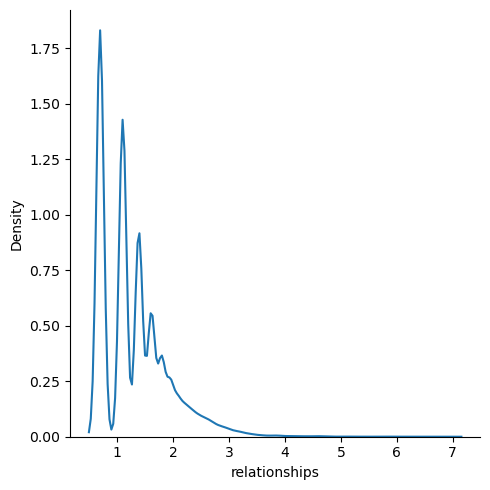

In [25]:
for col in num_feat:
    plt.figure(figsize = (10,8))
    sns.displot(data = df_company2, kind = "kde", x = col)

### b) Standardisation

In [26]:
std = StandardScaler().set_output(transform = "pandas")
std_df = std.fit_transform(df_company2[num_feat])
std_df

,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-0.335646
1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767
2,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,-0.335646
3,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,2.336215
4,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,0.141941
...,...,...,...,...,...,...,...,...,...
60270,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,0.815062
60271,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,2.336215
60272,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,4.160044
60273,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767


In [27]:
df_company2.drop(num_feat, axis = 1, inplace = True)
df_company2

,category_code,status,country_code,isClosed
0,advertising,operating,MAR,1
1,cleantech,operating,IND,1
2,advertising,operating,USA,1
3,web,acquired,USA,0
4,games_video,operating,USA,1
...,...,...,...,...
60270,ecommerce,operating,USA,1
60271,public_relations,operating,USA,1
60272,consulting,operating,USA,1
60273,search,operating,USA,1


In [28]:
df_company_scaled = pd.concat([df_company2,std_df], axis = 1, ignore_index = False)
df_company_scaled

,category_code,status,country_code,isClosed,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,advertising,operating,MAR,1,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-0.335646
1,cleantech,operating,IND,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767
2,advertising,operating,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,-0.335646
3,web,acquired,USA,0,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,2.336215
4,games_video,operating,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,0.141941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,ecommerce,operating,USA,1,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,0.815062
60271,public_relations,operating,USA,1,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,2.336215
60272,consulting,operating,USA,1,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,4.160044
60273,search,operating,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\si

<Figure size 1000x800 with 0 Axes>

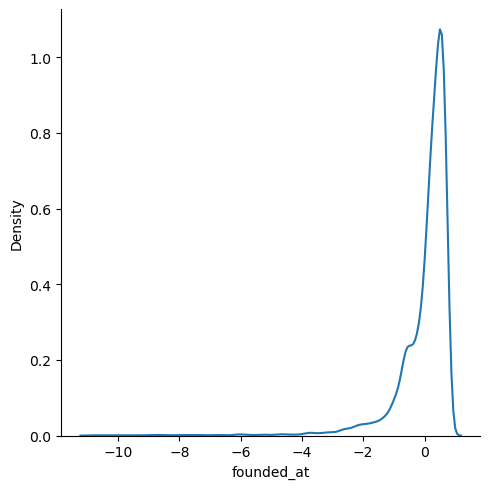

<Figure size 1000x800 with 0 Axes>

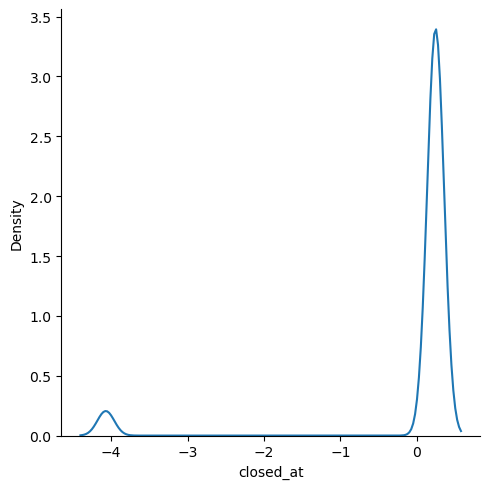

<Figure size 1000x800 with 0 Axes>

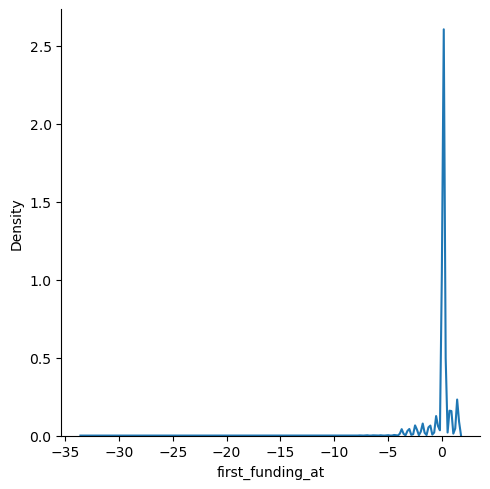

<Figure size 1000x800 with 0 Axes>

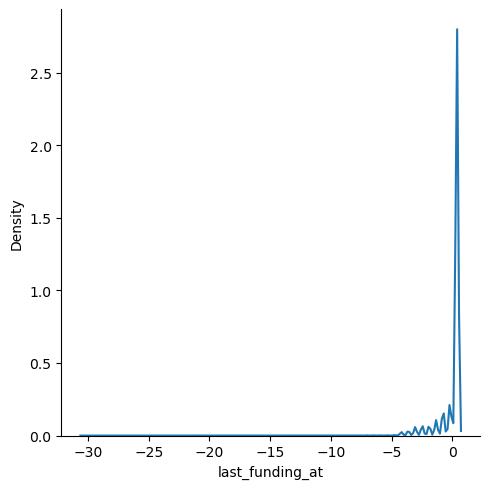

<Figure size 1000x800 with 0 Axes>

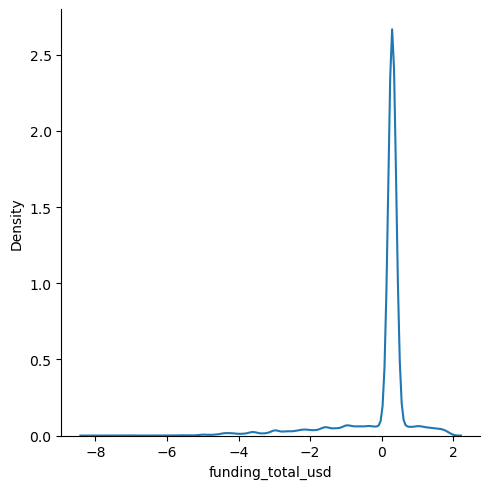

<Figure size 1000x800 with 0 Axes>

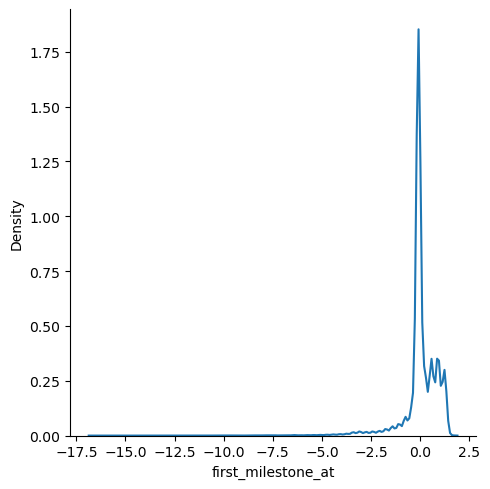

<Figure size 1000x800 with 0 Axes>

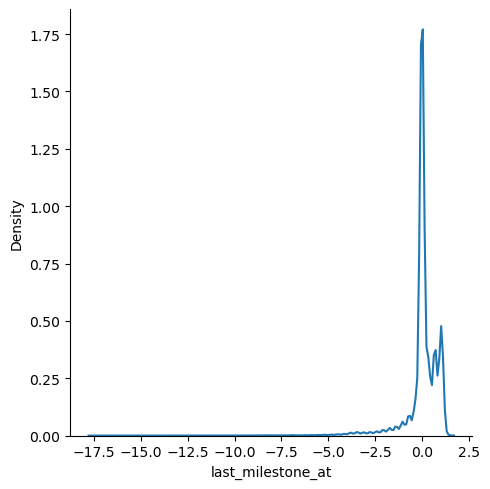

<Figure size 1000x800 with 0 Axes>

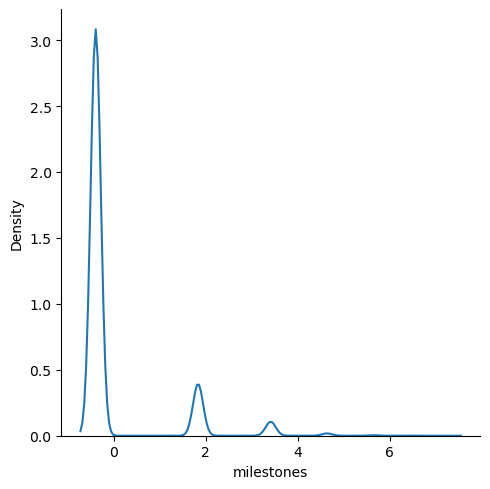

<Figure size 1000x800 with 0 Axes>

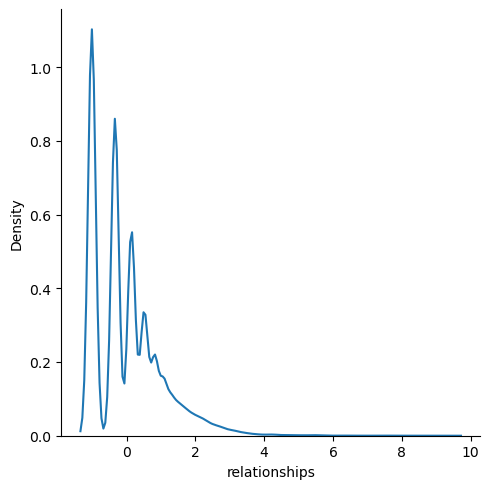

In [29]:
for col in num_feat:
    plt.figure(figsize = (10,8))
    sns.displot(data = df_company_scaled, kind = "kde", x = col)

## 3) Creation of new features/ Adding interaction terms

In [30]:
num_feat

['founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships']

In [31]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_feat = poly.fit_transform(df_company_scaled[num_feat])
poly_feat

array([[ 1.47249825e-01,  2.45790774e-01,  1.43829940e-01, ...,
         5.45949589e-03,  4.70742636e-03,  1.30657034e-01],
       [ 2.48583671e-01,  2.45790774e-01,  1.43829940e-01, ...,
         5.45949589e-03,  1.41479222e-02,  3.92682839e-01],
       [ 2.48583671e-01,  2.45790774e-01,  1.43829940e-01, ...,
         2.73688922e-01,  2.35987072e-01,  1.30657034e-01],
       ...,
       [-4.77707972e+00,  2.45790774e-01,  1.43829940e-01, ...,
         3.47323487e+00,  4.23607946e+00,  1.41894609e+01],
       [ 2.48583671e-01,  2.45790774e-01,  1.43829940e-01, ...,
         5.45949589e-03,  1.41479222e-02,  3.92682839e-01],
       [ 1.47249825e-01,  2.45790774e-01, -1.79655662e+00, ...,
        -1.28923003e+00,  7.09246723e-01, -1.84975886e+00]])

In [32]:
# Creating a dataframe that contains input features with interactions terms
columns = poly.get_feature_names_out(num_feat)
df_interact = pd.DataFrame(poly_feat, columns=columns)
df_interact

,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,founded_at closed_at,...,funding_total_usd first_milestone_at,funding_total_usd last_milestone_at,funding_total_usd milestones,funding_total_usd relationships,first_milestone_at last_milestone_at,first_milestone_at milestones,first_milestone_at relationships,last_milestone_at milestones,last_milestone_at relationships,milestones relationships
0,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-0.335646,0.036193,...,-0.026319,-0.004127,-0.114545,-0.098766,0.001254,0.034817,0.030021,0.005459,0.004707,0.130657
1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,0.061100,...,-0.026319,-0.004127,-0.114545,-0.296836,0.001254,0.034817,0.090227,0.005459,0.014148,0.392683
2,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,-0.335646,0.061100,...,-0.123920,-0.206886,-0.114545,-0.098766,0.296090,0.163934,0.141351,0.273689,0.235987,0.130657
3,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,2.336215,-0.599266,...,-0.177219,0.283777,1.435363,0.983120,-0.283989,-1.436432,-0.983852,2.300127,1.575421,7.968577
4,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,0.141941,0.061100,...,-0.123920,-0.206886,-0.114545,0.041767,0.296090,0.163934,-0.059776,0.273689,-0.099796,-0.055253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,0.815062,0.036193,...,0.363601,0.299634,0.539572,0.239837,1.258245,2.265808,1.007139,1.867198,0.829959,1.494564
60271,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,2.336215,0.036193,...,-1.526367,-1.257842,0.480851,-2.885843,1.258245,-0.481005,2.886768,-0.396385,2.378915,-0.909418
60272,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,4.160044,-1.174162,...,0.266193,0.299634,1.003676,1.224119,0.921166,3.085600,3.763306,3.473235,4.236079,14.189461
60273,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,0.061100,...,-0.026319,-0.004127,-0.114545,-0.296836,0.001254,0.034817,0.090227,0.005459,0.014148,0.392683


In [31]:
df_interact.columns

Index(['founded_at', 'active_days', 'first_funding_at', 'last_funding_at',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lng', 'founded_at active_days',
       'founded_at first_funding_at', 'founded_at last_funding_at',
       'founded_at funding_total_usd', 'founded_at first_milestone_at',
       'founded_at last_milestone_at', 'founded_at milestones',
       'founded_at relationships', 'founded_at lng',
       'active_days first_funding_at', 'active_days last_funding_at',
       'active_days funding_total_usd', 'active_days first_milestone_at',
       'active_days last_milestone_at', 'active_days milestones',
       'active_days relationships', 'active_days lng',
       'first_funding_at last_funding_at',
       'first_funding_at funding_total_usd',
       'first_funding_at first_milestone_at',
       'first_funding_at last_milestone_at', 'first_funding_at milestones',
       'first_funding_at relationships', 'first_fun

<Axes: >

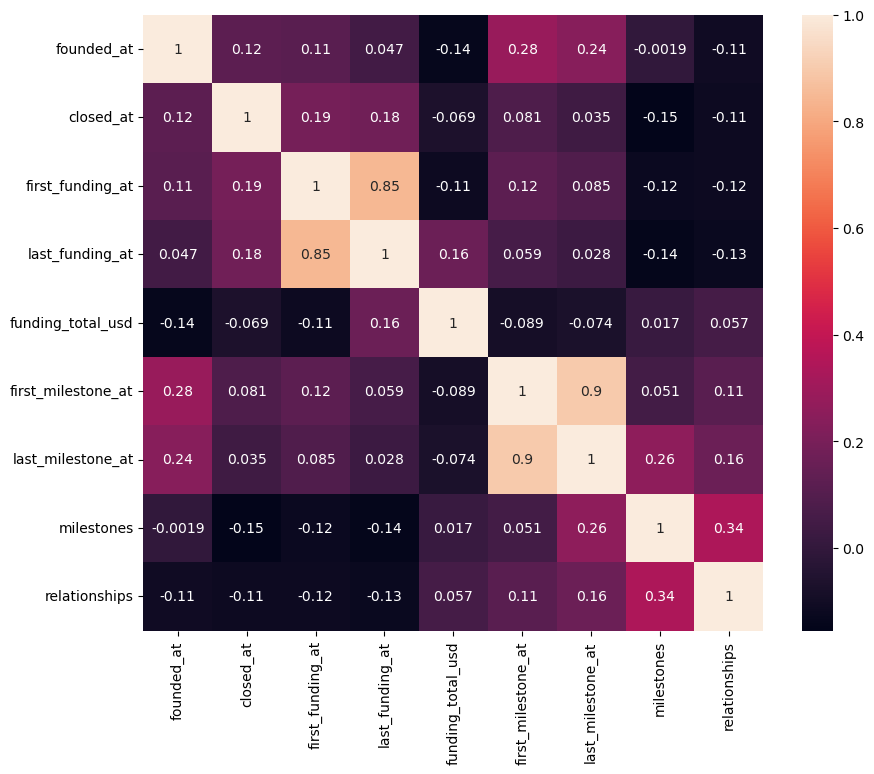

In [33]:
# Displaying heatmap of features' correlation in order to select the bests interaction terms
plt.figure(figsize = (10,8))
sns.heatmap(df_company_scaled[num_feat].corr(method = "pearson"), annot = True)

In [34]:
# Selecting features and bests interaction terms
df_interact = df_interact[['founded_at', 'closed_at','first_funding_at', 'last_funding_at','funding_total_usd',
                           'first_milestone_at','last_milestone_at','milestones', 'relationships', 
                           'first_funding_at last_milestone_at',
                           'first_milestone_at last_milestone_at','milestones relationships']]

In [35]:
df_interact

,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,first_funding_at last_milestone_at,first_milestone_at last_milestone_at,milestones relationships
0,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-0.335646,-0.002017,0.001254,0.130657
1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,-0.002017,0.001254,0.392683
2,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,-0.335646,-0.101124,0.296090,0.130657
3,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,2.336215,-1.211504,-0.283989,7.968577
4,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,0.141941,-0.101124,0.296090,-0.055253
...,...,...,...,...,...,...,...,...,...,...,...,...
60270,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,0.815062,0.146459,1.258245,1.494564
60271,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,2.336215,-1.829393,1.258245,-0.909418
60272,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,4.160044,0.146459,0.921166,14.189461
60273,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,-0.002017,0.001254,0.392683


In [36]:
# Concatening interaction terms to old dataframe
df_company_interact = pd.concat([df_company_scaled.drop(num_feat, axis = 1),df_interact], axis = 1, ignore_index = False)
df_company_interact

,category_code,status,country_code,isClosed,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,first_funding_at last_milestone_at,first_milestone_at last_milestone_at,milestones relationships
0,advertising,operating,MAR,1,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-0.335646,-0.002017,0.001254,0.130657
1,cleantech,operating,IND,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,-0.002017,0.001254,0.392683
2,advertising,operating,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,-0.335646,-0.101124,0.296090,0.130657
3,web,acquired,USA,0,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,2.336215,-1.211504,-0.283989,7.968577
4,games_video,operating,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,0.141941,-0.101124,0.296090,-0.055253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,ecommerce,operating,USA,1,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,0.815062,0.146459,1.258245,1.494564
60271,public_relations,operating,USA,1,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,2.336215,-1.829393,1.258245,-0.909418
60272,consulting,operating,USA,1,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,4.160044,0.146459,0.921166,14.189461
60273,search,operating,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,-0.002017,0.001254,0.392683


## 4) Encoding categorical variables

### a) Target

In [37]:
labl_enc = LabelEncoder()
df_company_interact["status"] = labl_enc.fit_transform(df_company_interact["status"])
df_company_interact

,category_code,status,country_code,isClosed,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,first_funding_at last_milestone_at,first_milestone_at last_milestone_at,milestones relationships
0,advertising,3,MAR,1,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-0.335646,-0.002017,0.001254,0.130657
1,cleantech,3,IND,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,-0.002017,0.001254,0.392683
2,advertising,3,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,-0.335646,-0.101124,0.296090,0.130657
3,web,0,USA,0,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,2.336215,-1.211504,-0.283989,7.968577
4,games_video,3,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,0.141941,-0.101124,0.296090,-0.055253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,ecommerce,3,USA,1,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,0.815062,0.146459,1.258245,1.494564
60271,public_relations,3,USA,1,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,2.336215,-1.829393,1.258245,-0.909418
60272,consulting,3,USA,1,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,4.160044,0.146459,0.921166,14.189461
60273,search,3,USA,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,-1.008767,-0.002017,0.001254,0.392683


### b) Categorical Features

In [38]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = "pandas")
ohe_transform = ohe.fit_transform(df_company_interact[["category_code","country_code"]])
ohe_transform

,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_design,category_code_ecommerce,category_code_education,category_code_enterprise,...,country_code_UZB,country_code_VCT,country_code_VEN,country_code_VGB,country_code_VIR,country_code_VNM,country_code_YEM,country_code_ZAF,country_code_ZMB,country_code_ZWE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60272,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_company_final = pd.concat([df_company_interact.drop(["category_code","country_code"], axis = 1),ohe_transform], axis = 1, ignore_index = False)
df_company_final

,status,isClosed,founded_at,closed_at,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_code_UZB,country_code_VCT,country_code_VEN,country_code_VGB,country_code_VIR,country_code_VNM,country_code_YEM,country_code_ZAF,country_code_ZMB,country_code_ZWE
0,3,1,0.147250,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.147250,-4.069723,-1.796557,-2.470913,0.420818,-0.421131,0.674348,3.410892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.421131,-0.703083,-0.389270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,3,1,0.147250,0.245791,0.143830,0.388937,0.294256,1.235660,1.018278,1.833682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60271,3,1,0.147250,0.245791,-1.796557,-2.470913,-1.235264,1.235660,1.018278,-0.389270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60272,3,1,-4.777080,0.245791,0.143830,0.388937,0.294256,0.904631,1.018278,3.410892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60273,3,1,0.248584,0.245791,0.143830,0.388937,0.294256,-0.089443,-0.014025,-0.389270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_company_final.corr()["status"]

status              1.000000
isClosed            0.978305
founded_at          0.123013
closed_at           0.901146
first_funding_at    0.251905
                      ...   
country_code_VNM    0.007813
country_code_YEM    0.001748
country_code_ZAF    0.006074
country_code_ZMB    0.001236
country_code_ZWE    0.002472
Name: status, Length: 221, dtype: float64

## 5) Feature engineering Documentation

Feature engineering is the process of using some techniques and domain knowledges to create new input features from data to improve the performance of machine learning models. It involves transforming raw data into meaningful features that  better represent the underlying relation. In our case we followed-up these steps:
           
   -**Feature Selection**: It consisted in firstly applying on numerical features, kruskal-wallis dependency test and training models like RandomForestClassifier, XGBOOST in order to retrieve features importance from these models. We have removed "lat" and "funding_rounds" because of their high p_value and low feature importance score. Secondly on categorical features we applyed khi square, and v-cramer dependency tests. We have decided to conserve all 3 categorical features because of their very low P_Values and high V-cramer score.
    
   -**Log transformation and standardisation**: here we started by identifying features with absolute skew value upper than 1 and then we applyed log transformations on these features. After that we standardised all numerical features.
   
   -**Creation of new features**: we created new interaction terms with a transformer named PolynomialFeatures(). This generate 45 new features and we selected the best interaction terms based on features' correlations. It remains 4 interaction terms.
   
   -**Feature Encoding variables**: it involved firstly encoding target variable with LabelEncoder and secondly encoding categorical features with OneHotEncoder. 